# **Análise Exploratória de Dados**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('../dados_finais_2024/final_data.xlsx')

In [3]:
df.head()

,ID Resultado,ID Competidor,Nome Competidor,ID Competição,Classe Vela,Pontuação Regata,Descarte,Flotilha,Posição Geral,Punição,Pontuação Total,Nett,Nome Competição
0,1,1,"WILLIAM JONES, EVAN DEPAUL",17.0,49ER,11,1,GERAL,1,UFD,44.0,33.0,World Championship 2017
1,2,2,"DOMINIK BUKSAK, SZYMON WIERZBICKI",7.0,49ER,3,0,GERAL,1,NaN,89.0,66.0,Semaine Olympique Francaise De Voile 2022
2,3,2,"DOMINIK BUKSAK, SZYMON WIERZBICKI",7.0,49ER,1,0,GERAL,1,NaN,89.0,66.0,Semaine Olympique Francaise De Voile 2022
3,4,2,"DOMINIK BUKSAK, SZYMON WIERZBICKI",7.0,49ER,1,0,GERAL,1,NaN,89.0,66.0,Semaine Olympique Francaise De Voile 2022
4,5,2,"DOMINIK BUKSAK, SZYMON WIERZBICKI",7.0,49ER,3,0,GERAL,1,NaN,89.0,66.0,Semaine Olympique Francaise De Voile 2022


In [4]:
print("O DataFrame contém {} entradas com {} colunas".format(df.shape[0], df.shape[1]))

O DataFrame contém 158146 entradas com 13 colunas


In [5]:
print("As colunas são: {}".format(df.columns.values))

As colunas são: ['ID Resultado' 'ID Competidor' 'Nome Competidor' 'ID Competição'
 'Classe Vela' 'Pontuação Regata' 'Descarte' 'Flotilha' 'Posição Geral'
 'Punição' 'Pontuação Total' 'Nett' 'Nome Competição']


In [6]:
competidores = np.unique(df['Nome Competidor'])
print("No total, há {} competidores ou duplas".format(len(competidores)))

No total, há 4463 competidores ou duplas


In [7]:
competidores

array(['ABAY BERKAY', 'ABDULMAJEED AL-HADHRAMI', 'ACHILLEAS GHICAS', ...,
       'Ģirts TIMROTS', 'Ņikita LAKSTĪGALA', 'Šārona Alīda CAUNE'],
      dtype=object)

In [8]:
# contando a quantidade de competidores que não estava em dupla

def duplas(x):
    x = x.split(',')
    if len(x) == 1:
        return 0
    else:
        return 1

duplas_list = df['Nome Competidor'].map(lambda x: duplas(x)) 

print("A porcentagem de dados individuais é: {}".format(np.format_float_positional(100*duplas_list.value_counts()[0]/df.shape[0],4)))

A porcentagem de dados individuais é: 67.4352


In [9]:
# número de competidores que mudaram de dupla

def mudanca_dupla(x):
    x = x.split(',')
    if len(x) == 2:
        return 1
    else:
        return 0
    
apenas_duplas = df['Nome Competidor'].map(lambda x: mudanca_dupla(x))

df_duplas = df[apenas_duplas == 1]

df_duplas= df_duplas.groupby(df['Nome Competidor']).mean()

df_duplas

C:\Users\emanu\AppData\Local\Temp\ipykernel_30036\2855156656.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_duplas= df_duplas.groupby(df['Nome Competidor']).mean()


,ID Resultado,ID Competidor,ID Competição,Descarte,Posição Geral,Pontuação Total,Nett
Nome Competidor,,,,,,,
"ADAM GLOGOWSKI, MACIEJ KRUSIEC",51726.102804,567.0,12.046729,0.056075,40.037383,222.906542,193.514019
"AFRODITE ZEGERS, PIM VAN VUGT",24602.477273,451.0,9.431818,0.022727,32.568182,157.250000,125.227273
"AGNIESZKA PAWLOWSKA, BARTEK SZLIJA",148923.000000,3717.0,34.000000,0.090909,46.000000,190.000000,163.000000
"AGNIESZKA PAWLOWSKA, BARTLOMIEJ SZLIJA",33982.904762,714.0,9.261905,0.023810,51.357143,217.047619,185.238095
"AHMED AL HASANI, ABDULRAHMAN AL MASHARI",39229.511628,541.0,13.255814,0.069767,55.116279,219.139535,196.000000
...,...,...,...,...,...,...,...
"ZIHE LI, DIANJI LI",48047.500000,1090.0,15.000000,0.062500,75.000000,331.000000,299.000000
"ZOE ROOSEN, NICOLAS TOSI",24790.433333,505.0,8.733333,0.066667,32.533333,473.666667,439.133333
"ZOFIA BURSKA, SARA TKADLECOVA",62137.852941,715.0,14.955882,0.044118,52.764706,342.014706,308.661765


In [10]:
# obter competidores que mudaram de dupla

idx = df_duplas.index

idx = list(idx)

mudanca_dupla_timoneiro = []

mudanca_dupla_proeiro = []

mudou = set()

for i in range(len(idx)):
    for j in range(i+1,len(idx)):
        c = idx[i].split(',')
        c1 = c[0]
        c2 = c[1]
        if c1 in idx[j] or c2 in idx[j]:
            mudou.add(idx[i])
        if c1 in idx[j]:
            mudanca_dupla_timoneiro.append([idx[i],idx[j]])
        if c2 in idx[j]:
            mudanca_dupla_proeiro.append([idx[i],idx[j]])
        

# print("O número de competidores que mudaram de dupla é: {}".format(len(mudanca_dupla_n)))

# print('Esse número representa {:.2f}% do total das duplas'.format(100*len(mudanca_dupla_n)/len(df_duplas)))

# print('Considerando o total de competidores incluindo, esse número representa {:.2f}%'.format(100*len(mudanca_dupla_n)/len(competidores)))

In [11]:
mudou

{'AFRODITE ZEGERS, PIM VAN VUGT',
 'AGNIESZKA PAWLOWSKA, BARTEK SZLIJA',
 'AHMED AL HASANI, ABDULRAHMAN AL MASHARI',
 'AHMED AL HASANI, VIRGIL AUBRIOT',
 'AI KONDO YOSHIDA, NAOYA KIMURA',
 'AI KONDO YOSHIDA, YUGO YOSHIDA',
 'AKIRA TAKAYANAGI, SHINGEN FURUYA',
 'AKSELI KESKINEN, RONI PATTERSON',
 'ALBANE DUBOIS, LILI SEBESI',
 'ALBIN BOMAN, SIMON ALM',
 'ALEKSANDRA MELZACKA, KINGA LOBODA',
 'ALEKSANDRA MELZACKA, SANDRA JANKOWIAK',
 'ALESSIO BELLICO, BENEDETTA DI SALLE',
 'ALEXANDER BRORSSON, OSCAR ANDERSSON',
 'ALEXANDER HEINZEMANN, CLIFTON KARTNER',
 'ALEXANDER HEINZEMANN, EDWARD COLEMAN',
 'ALEXANDER HEINZEMANN, JUSTIN BARNES',
 'ALEXANDR MOSKVICHEV, KIRILL ELCHANINOV',
 'ALEXANDRA MALONEY, MOLLY MEECH',
 'ALEXANDRA MALONEY, OLIVIA HOBBS',
 'ALICE MOSS, AMANDA LJUNGGREN',
 'ALICE MOSS, EBBA BERNTSSON',
 'ALICE MOSS, HANNA JOHNSSON',
 'ALICIA FRAS ELENA, BARRIO GARCIA',
 'ALICIA FRAS SAMSON, ELENA BARRIO GARCIA',
 'ALOISE RETORNAZ, HUGO LE CLECH',
 'AMELIA STABBACK, CAITLIN ELKS',
 'AM

In [12]:
mudanca_dupla_proeiro

[['AFRODITE ZEGERS, PIM VAN VUGT', 'BART LAMBRIEX, PIM VAN VUGT'],
 ['AFRODITE ZEGERS, PIM VAN VUGT', 'JOLBERT VAN DIJK, PIM VAN VUGT'],
 ['AHMED AL HASANI, VIRGIL AUBRIOT', 'ERWAN FISCHER, VIRGIL AUBRIOT'],
 ['AHMED AL HASANI, VIRGIL AUBRIOT', 'HUGO FEDRIGUCCI, VIRGIL AUBRIOT'],
 ['AHMED AL HASANI, VIRGIL AUBRIOT', 'YANNIS NAUDY, VIRGIL AUBRIOT'],
 ['AI KONDO YOSHIDA, YUGO YOSHIDA', 'AI YOSHIDA, YUGO YOSHIDA'],
 ['ALBANE DUBOIS, LILI SEBESI', 'JULIE BOSSARD, LILI SEBESI'],
 ['ALEKSANDRA MELZACKA, SANDRA JANKOWIAK', 'EWA ROMANIUK, SANDRA JANKOWIAK'],
 ['ALEXANDER HEINZEMANN, EDWARD COLEMAN', 'DYLAN JONES, EDWARD COLEMAN'],
 ['ALEXANDER HEINZEMANN, JUSTIN BARNES', 'DAVID MORI, JUSTIN BARNES'],
 ['ALEXANDER HEINZEMANN, JUSTIN BARNES', 'WILLIAM JONES, JUSTIN BARNES'],
 ['ALEXANDR MOSKVICHEV, KIRILL ELCHANINOV',
  'DENIS MAKAROV, KIRILL ELCHANINOV'],
 ['ALEXANDRA MALONEY, MOLLY MEECH', 'JO ALEH, MOLLY MEECH'],
 ['ALEXANDRA MALONEY, OLIVIA HOBBS', 'CRYSTAL SUN, OLIVIA HOBBS'],
 ['ALICE MOSS

In [13]:
print(len(mudanca_dupla_timoneiro))

print(len(mudanca_dupla_proeiro))

488
286


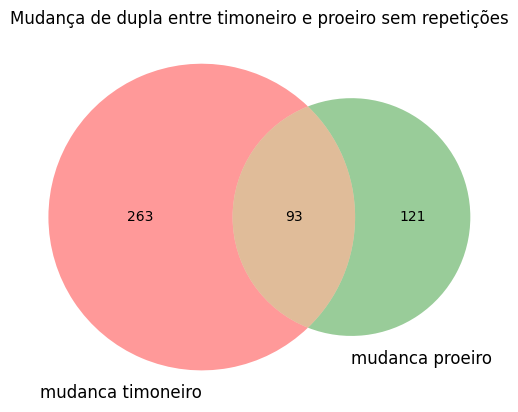

In [14]:
from matplotlib_venn import venn3,venn2
import matplotlib.pyplot as plt


mudanca_dupla_timoneiro_s = set(i[0] for i in mudanca_dupla_timoneiro)
mudanca_dupla_proeiro_s = set(i[0] for i in mudanca_dupla_proeiro)

venn2([mudanca_dupla_timoneiro_s, mudanca_dupla_proeiro_s], ('mudanca timoneiro', 'mudanca proeiro', 'ambos_mudaram'))
plt.title("Mudança de dupla entre timoneiro e proeiro sem repetições")
plt.show()

In [15]:
mudanca_dupla_proeiro_s

{'AFRODITE ZEGERS, PIM VAN VUGT',
 'AHMED AL HASANI, VIRGIL AUBRIOT',
 'AI KONDO YOSHIDA, YUGO YOSHIDA',
 'ALBANE DUBOIS, LILI SEBESI',
 'ALEKSANDRA MELZACKA, SANDRA JANKOWIAK',
 'ALEXANDER HEINZEMANN, EDWARD COLEMAN',
 'ALEXANDER HEINZEMANN, JUSTIN BARNES',
 'ALEXANDR MOSKVICHEV, KIRILL ELCHANINOV',
 'ALEXANDRA MALONEY, MOLLY MEECH',
 'ALEXANDRA MALONEY, OLIVIA HOBBS',
 'ALICE MOSS, AMANDA LJUNGGREN',
 'ALICE MOSS, EBBA BERNTSSON',
 'ALICE MOSS, HANNA JOHNSSON',
 'ALICIA FRAS ELENA, BARRIO GARCIA',
 'ALICIA FRAS SAMSON, ELENA BARRIO GARCIA',
 'AMELIA STABBACK, CAITLIN ELKS',
 'AMELIA STABBACK, ELLA CLARK',
 'AMELIE FLANDORFFER, PIERRE WILLIOT',
 'ANDREA BREWSTER, SASKIA TIDEY',
 'ANDRES BARRIO, ANTONIO TORRADO MARTINEZ',
 'ANDREW MOLLERUS, IAN MACDIARMID',
 'ANGELIKA KOHLENDORFER, LISA FARTHOFER',
 'ANN KRISTIN WEDEMEYER, LEONIE MEYER',
 'ANNA BURNET, STEPHANIE ORTON',
 'ANNA TOBIAS, PARIS HENKEN',
 'ANNA YAMAZAKI, N/A',
 'ANNA YAMAZAKI, SENA TAKANO',
 'ANNE-JULIE SCHUTT, IBEN NIELSBY

In [16]:
mudanca_duplas = mudanca_dupla_timoneiro_s.union(mudanca_dupla_proeiro_s)

In [17]:
len(mudanca_duplas)

mudanca_duplas

{'AFRODITE ZEGERS, PIM VAN VUGT',
 'AGNIESZKA PAWLOWSKA, BARTEK SZLIJA',
 'AHMED AL HASANI, ABDULRAHMAN AL MASHARI',
 'AHMED AL HASANI, VIRGIL AUBRIOT',
 'AI KONDO YOSHIDA, NAOYA KIMURA',
 'AI KONDO YOSHIDA, YUGO YOSHIDA',
 'AKIRA TAKAYANAGI, SHINGEN FURUYA',
 'AKSELI KESKINEN, RONI PATTERSON',
 'ALBANE DUBOIS, LILI SEBESI',
 'ALBIN BOMAN, SIMON ALM',
 'ALEKSANDRA MELZACKA, KINGA LOBODA',
 'ALEKSANDRA MELZACKA, SANDRA JANKOWIAK',
 'ALESSIO BELLICO, BENEDETTA DI SALLE',
 'ALEXANDER BRORSSON, OSCAR ANDERSSON',
 'ALEXANDER HEINZEMANN, CLIFTON KARTNER',
 'ALEXANDER HEINZEMANN, EDWARD COLEMAN',
 'ALEXANDER HEINZEMANN, JUSTIN BARNES',
 'ALEXANDR MOSKVICHEV, KIRILL ELCHANINOV',
 'ALEXANDRA MALONEY, MOLLY MEECH',
 'ALEXANDRA MALONEY, OLIVIA HOBBS',
 'ALICE MOSS, AMANDA LJUNGGREN',
 'ALICE MOSS, EBBA BERNTSSON',
 'ALICE MOSS, HANNA JOHNSSON',
 'ALICIA FRAS ELENA, BARRIO GARCIA',
 'ALICIA FRAS SAMSON, ELENA BARRIO GARCIA',
 'ALOISE RETORNAZ, HUGO LE CLECH',
 'AMELIA STABBACK, CAITLIN ELKS',
 'AM

In [18]:
df_duplas

,ID Resultado,ID Competidor,ID Competição,Descarte,Posição Geral,Pontuação Total,Nett
Nome Competidor,,,,,,,
"ADAM GLOGOWSKI, MACIEJ KRUSIEC",51726.102804,567.0,12.046729,0.056075,40.037383,222.906542,193.514019
"AFRODITE ZEGERS, PIM VAN VUGT",24602.477273,451.0,9.431818,0.022727,32.568182,157.250000,125.227273
"AGNIESZKA PAWLOWSKA, BARTEK SZLIJA",148923.000000,3717.0,34.000000,0.090909,46.000000,190.000000,163.000000
"AGNIESZKA PAWLOWSKA, BARTLOMIEJ SZLIJA",33982.904762,714.0,9.261905,0.023810,51.357143,217.047619,185.238095
"AHMED AL HASANI, ABDULRAHMAN AL MASHARI",39229.511628,541.0,13.255814,0.069767,55.116279,219.139535,196.000000
...,...,...,...,...,...,...,...
"ZIHE LI, DIANJI LI",48047.500000,1090.0,15.000000,0.062500,75.000000,331.000000,299.000000
"ZOE ROOSEN, NICOLAS TOSI",24790.433333,505.0,8.733333,0.066667,32.533333,473.666667,439.133333
"ZOFIA BURSKA, SARA TKADLECOVA",62137.852941,715.0,14.955882,0.044118,52.764706,342.014706,308.661765


In [19]:
# obter competidores que mudaram de dupla

idx = df_duplas.index

idx = list(idx)

mudanca_dupla_timoneiro = []

mudanca_dupla_proeiro = []

mudou = []

for i in range(len(idx)):
    for j in range(i+1,len(idx)):
        c = idx[i].split(',')
        c1 = c[0]
        c2 = c[1]
        if c1 in idx[j] or c2 in idx[j]:
            mudou.append([idx[i],idx[j]])
        if c1 in idx[j]:
            mudanca_dupla_timoneiro.append([idx[i],idx[j]])
        if c2 in idx[j]:
            mudanca_dupla_proeiro.append([idx[i],idx[j]])
        

# print("O número de competidores que mudaram de dupla é: {}".format(len(mudanca_dupla_n)))

# print('Esse número representa {:.2f}% do total das duplas'.format(100*len(mudanca_dupla_n)/len(df_duplas)))

# print('Considerando o total de competidores incluindo, esse número representa {:.2f}%'.format(100*len(mudanca_dupla_n)/len(competidores)))

In [20]:
mudou

[['AFRODITE ZEGERS, PIM VAN VUGT', 'BART LAMBRIEX, PIM VAN VUGT'],
 ['AFRODITE ZEGERS, PIM VAN VUGT', 'JOLBERT VAN DIJK, PIM VAN VUGT'],
 ['AGNIESZKA PAWLOWSKA, BARTEK SZLIJA',
  'AGNIESZKA PAWLOWSKA, BARTLOMIEJ SZLIJA'],
 ['AHMED AL HASANI, ABDULRAHMAN AL MASHARI',
  'AHMED AL HASANI, VIRGIL AUBRIOT'],
 ['AHMED AL HASANI, VIRGIL AUBRIOT', 'ERWAN FISCHER, VIRGIL AUBRIOT'],
 ['AHMED AL HASANI, VIRGIL AUBRIOT', 'HUGO FEDRIGUCCI, VIRGIL AUBRIOT'],
 ['AHMED AL HASANI, VIRGIL AUBRIOT', 'YANNIS NAUDY, VIRGIL AUBRIOT'],
 ['AI KONDO YOSHIDA, NAOYA KIMURA', 'AI KONDO YOSHIDA, YUGO YOSHIDA'],
 ['AI KONDO YOSHIDA, NAOYA KIMURA', 'YUGO YOSHIDA, AI KONDO YOSHIDA'],
 ['AI KONDO YOSHIDA, YUGO YOSHIDA', 'AI YOSHIDA, YUGO YOSHIDA'],
 ['AI KONDO YOSHIDA, YUGO YOSHIDA', 'YUGO YOSHIDA, AI KONDO YOSHIDA'],
 ['AKIRA TAKAYANAGI, SHINGEN FURUYA', 'SHINGEN FURUYA, AKIRA TAKAYANAGI'],
 ['AKSELI KESKINEN, RONI PATTERSON', 'AKSELI KESKINEN, SINEM KURTBAY'],
 ['ALBANE DUBOIS, LILI SEBESI', 'BRICE YRIEIX, ALBANE DU

In [21]:
df_duplas

,ID Resultado,ID Competidor,ID Competição,Descarte,Posição Geral,Pontuação Total,Nett
Nome Competidor,,,,,,,
"ADAM GLOGOWSKI, MACIEJ KRUSIEC",51726.102804,567.0,12.046729,0.056075,40.037383,222.906542,193.514019
"AFRODITE ZEGERS, PIM VAN VUGT",24602.477273,451.0,9.431818,0.022727,32.568182,157.250000,125.227273
"AGNIESZKA PAWLOWSKA, BARTEK SZLIJA",148923.000000,3717.0,34.000000,0.090909,46.000000,190.000000,163.000000
"AGNIESZKA PAWLOWSKA, BARTLOMIEJ SZLIJA",33982.904762,714.0,9.261905,0.023810,51.357143,217.047619,185.238095
"AHMED AL HASANI, ABDULRAHMAN AL MASHARI",39229.511628,541.0,13.255814,0.069767,55.116279,219.139535,196.000000
...,...,...,...,...,...,...,...
"ZIHE LI, DIANJI LI",48047.500000,1090.0,15.000000,0.062500,75.000000,331.000000,299.000000
"ZOE ROOSEN, NICOLAS TOSI",24790.433333,505.0,8.733333,0.066667,32.533333,473.666667,439.133333
"ZOFIA BURSKA, SARA TKADLECOVA",62137.852941,715.0,14.955882,0.044118,52.764706,342.014706,308.661765


In [22]:
# Comparando a variação de notas entre competidores que mudaram de dupla

def variancia(x,y):
    return np.abs(x-y)

variancia_list = []

for c in mudou:
    c1 = c[0]
    c2 = c[1]
    # remover espaços em branco no início e no final
    try:
        variancia_list.append(variancia(df_duplas.loc[c1]['Posição Geral'],df_duplas.loc[c2]['Posição Geral']))
    except:
        print('erro', c)

mean = df_duplas['Posição Geral'].mean()
print(mean)

print(variancia_list)

40.137880442141615
[20.3459595959596, 26.086990595611283, 5.357142857142854, 31.883720930232556, 53.0, 38.74074074074074, 14.0, 7.1398809523809526, 1.72596153846154, 12.047619047619047, 5.4139194139194124, 6.851063829787236, 57.89622641509434, 19.686567164179106, 7.8941143339904265, 13.599610642439977, 6.0, 13.563636363636363, 3.509716599190284, 12.53076923076923, 1.6666666666666643, 18.882352941176464, 7.0, 8.591836734693878, 1.591836734693878, 49.0, 12.188651070184171, 15.162549230218403, 26.84210526315789, 9.948111464261956, 8.843120070113933, 31.37303058387396, 9.567567567567565, 3.0, 24.0, 6.567567567567565, 23.067567567567565, 18.0, 10.363636363636367, 56.55555555555556, 17.0, 6.636363636363633, 23.52238805970149, 0.4760787992495281, 8.441463414634145, 10.634615384615383, 0.6384662203286737, 23.645161290322584, 1.7902097902097909, 12.387782805429865, 4.159201295196979, 7.363636363636363, 1.359175257731959, 14.006993006993007, 18.635135135135137, 8.134095634095633, 33.635135135135

Text(0.5, 1.0, 'Variação de Pontuação entre Competidores que Mudaram de Dupla')

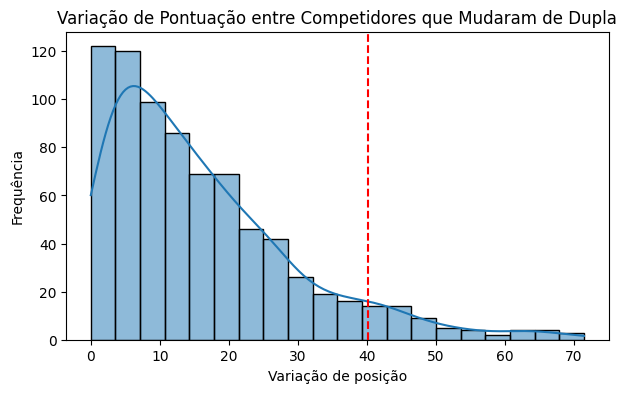

In [23]:
# plotando a variação de notas

plt.figure(figsize=(7,4))
sns.histplot(variancia_list, kde=True)
plt.axvline(mean, color='r', linestyle='--')  # Adiciona uma linha vertical na média
plt.xlabel('Variação de posição')
plt.ylabel('Frequência')
plt.title('Variação de Pontuação entre Competidores que Mudaram de Dupla')

In [24]:
# comparação corredores solos e em duplas

df_solo = df[duplas_list == 0]

print('Dados solo: ', df_solo.shape[0])

df_duplas = df[duplas_list == 1]

print('Dados duplas: ', df_duplas.shape[0])

Dados solo:  106646
Dados duplas:  51500


<BarContainer object of 2 artists>

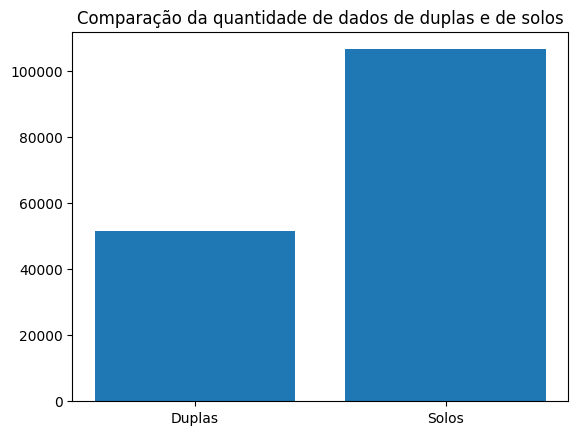

In [25]:
# plot dos dados

l1 = len(df_solo)
l0 = len(df_duplas)

# plot quantidade de dados de cada df

plt.title('Comparação da quantidade de dados de duplas e de solos')
plt.bar(['Duplas', 'Solos'], [l0, l1])

In [37]:
# para cada competidor único solo contar quantas vezes ele correu em duplas

comp = df_solo['Nome Competidor'].unique()

duplas_unicas = pd.Series(df_duplas['Nome Competidor'].unique())

corridas_solo = {}

corridas_dupla = []

for c in comp:
    corridas_solo[c] = duplas_unicas.str.contains(c).sum()
    corridas_dupla.append(duplas_unicas.str.contains(c))


In [40]:
len(comp)

3265

In [41]:
len(duplas_unicas)

1198

In [38]:
corridas_dupla

[0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 1193    False
 1194    False
 1195    False
 1196    False
 1197    False
 Length: 1198, dtype: bool,
 0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 1193    False
 1194    False
 1195    False
 1196    False
 1197    False
 Length: 1198, dtype: bool,
 0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 1193    False
 1194    False
 1195    False
 1196    False
 1197    False
 Length: 1198, dtype: bool,
 0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 1193    False
 1194    False
 1195    False
 1196    False
 1197    False
 Length: 1198, dtype: bool,
 0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 1193    False
 1194    False
 1195    False
 1196    False
 1197    False
 Length: 1198, dtype: bool,
 0       False
 1       False
 2   

In [39]:
corridas_dupla = sum(corridas_dupla)


In [53]:
values_duplas = pd.Series(corridas_dupla).value_counts()

In [55]:
values_duplas

0    1136
1      62
dtype: int64

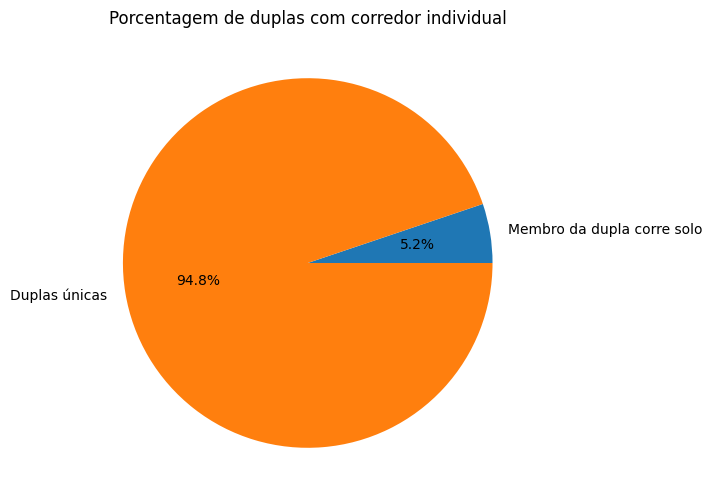

In [57]:
# Calcule o número total de competidores
total_competidores = len(duplas_unicas)

# Calcule o número de competidores que correram solo
competidores_solo = values_duplas[1]

# Calcule as porcentagens
porcentagem_solo = competidores_solo / total_competidores
porcentagem_nao_solo = 1 - porcentagem_solo

# Crie um gráfico de pizza
plt.figure(figsize=(10, 6))
plt.pie([porcentagem_solo, porcentagem_nao_solo], labels=['Membro da dupla corre solo', 'Duplas únicas'], autopct='%1.1f%%')
plt.title('Porcentagem de duplas com corredor individual')

# Exibe o gráfico
plt.show()

In [ ]:
corridas_dupla

In [28]:
corridas_dupla = duplas_unicas[corridas_dupla]

In [44]:
corridas_solo = pd.Series(corridas_solo)

In [45]:
corridas_solo[corridas_solo==11]

Series([], dtype: int64)

In [46]:
len(comp)

3265

In [47]:
corridas_solo.value_counts()

0    3223
1      29
2      11
3       1
8       1
dtype: int64

In [48]:
len(corridas_solo)

3265

In [49]:
len(comp)


3265

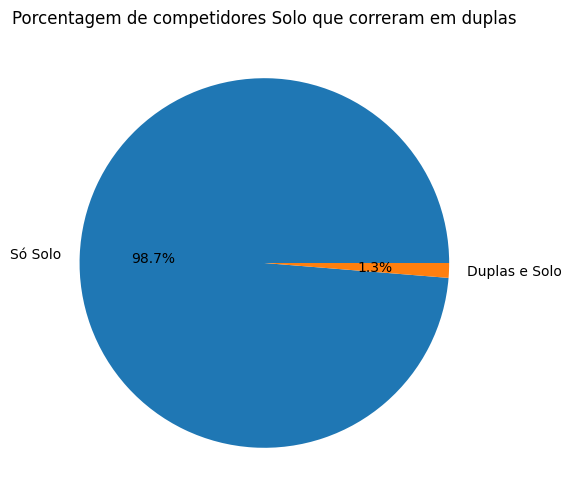

In [51]:
# Calcule o número total de competidores
total_competidores = len(comp)

# Calcule o número de competidores que correram solo
competidores_solo = corridas_solo.value_counts()[0]

# Calcule as porcentagens
porcentagem_solo = competidores_solo / total_competidores
porcentagem_nao_solo = 1 - porcentagem_solo

# Crie um gráfico de pizza
plt.figure(figsize=(10, 6))
plt.pie([porcentagem_solo, porcentagem_nao_solo], labels=['Só Solo','Duplas e Solo'], autopct='%1.1f%%')
plt.title('Porcentagem de competidores Solo que correram em duplas')

# Exibe o gráfico
plt.show()

In [ ]:
df_solo

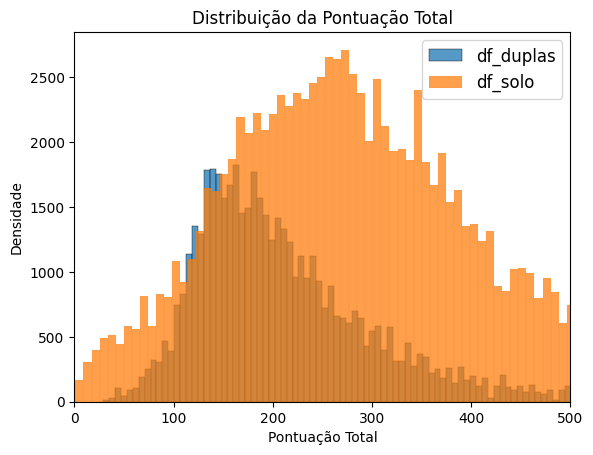

In [68]:
# Usando kdeplot
sns.histplot(df_duplas['Pontuação Total'], label="df_duplas")
sns.histplot(df_solo['Pontuação Total'], label="df_solo")

plt.legend(prop={'size': 12})
plt.title('Distribuição da Pontuação Total')
plt.xlabel('Pontuação Total')
plt.ylabel('Densidade')

# Limitando o intervalo do eixo x de 0 a 100
plt.xlim(0, 500)

plt.show()